# OmicsIntegrator2 on Human Transcription Data

## I. Prepare prizes

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
NUM = 500
human = pd.read_csv('../data/Yamuna/Human_NT_vs_ABCD1_DESeq2_results.tsv', sep='\t', header=None, names=['GeneID','Base_Mean','log2FC','StdErr','Wald_Stats','P_value','P_adj'])
human = pd.concat([human.set_index('GeneID').rename_axis(None).loc[['ABCD1', 'TGFB1']], human.set_index('GeneID').rename_axis(None)[:NUM]])
human.head()

,Base_Mean,log2FC,StdErr,Wald_Stats,P_value,P_adj
ABCD1,206.706956,2.835321,0.183205,15.476223,5.020961e-54,1.648218e-52
TGFB1,459.067424,-2.181096,0.116899,-18.657899,1.089306e-77,5.673349e-76
TAGLN2,3702.951794,2.954344,0.056286,52.488180,0.000000e+00,0.000000e+00
UHMK1,3543.839403,3.225018,0.067672,47.656533,0.000000e+00,0.000000e+00
CSRP1,4592.587776,-1.856967,0.046232,-40.165842,0.000000e+00,0.000000e+00


In [3]:
'CLDN5' in human.index.tolist(), 'ABCD1' in human.index.tolist(), 'TGFB1' in human.index.tolist(), 

(True, True, True)

In [4]:
human.loc[human['P_value'] == 0, 'P_value'] = 1e-309
human.loc[human['P_adj'] == 0, 'P_adj'] = 1e-310
human['prize'] = -np.log10(human.P_adj) / 100
human.loc["CLDN5", "prize"] += 2
human.loc["ABCD1", "prize"] += 5

human['log2FC'] = human['log2FC'] * -1
human.head()

,Base_Mean,log2FC,StdErr,Wald_Stats,P_value,P_adj,prize
ABCD1,206.706956,-2.835321,0.183205,15.476223,5.020961e-54,1.648218e-52,5.517830
TGFB1,459.067424,2.181096,0.116899,-18.657899,1.089306e-77,5.673349e-76,0.752462
TAGLN2,3702.951794,-2.954344,0.056286,52.488180,1.000000e-309,1.000000e-310,3.100000
UHMK1,3543.839403,-3.225018,0.067672,47.656533,1.000000e-309,1.000000e-310,3.100000
CSRP1,4592.587776,1.856967,0.046232,-40.165842,1.000000e-309,1.000000e-310,3.100000


In [7]:
prize_file = "human_deseq_prizes_500.tsv"
human[['prize','Base_Mean','log2FC','StdErr','Wald_Stats','P_value','P_adj']].to_csv(prize_file, sep='\t')

## II. PCSF

In [11]:
import networkx as nx
import OmicsIntegrator as oi

In [12]:
interactome_file = "../OmicsIntegrator2/interactomes/inbiomap.9.12.2016.exp.oi2"
prize_file = "human_deseq_prizes_500.tsv"
graph = oi.Graph(interactome_file, {'g':5})

In [13]:
graph.prepare_prizes(prize_file)

06:00:59 - OI2: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
06:00:59 - OI2: INFO - ['TGFB1']
06:00:59 - OI2: INFO - Members of the prize file not present in the interactome:
06:00:59 - OI2: INFO - ['AIM1', 'APOL3', 'ATP6V0E1', 'CXorf36', 'FAM198B', 'FAM63B', 'GLT25D1', 'NORAD', 'PRR29', 'RP6-99M1.2', 'TNFSF4']


In [14]:
vertex_indices, edge_indices = graph.pcsf()
len(vertex_indices)

93

In [15]:
forest, augmented_forest = graph.output_forest_as_networkx(vertex_indices, edge_indices)
forest

/Users/alex/Documents/abcd1/venv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


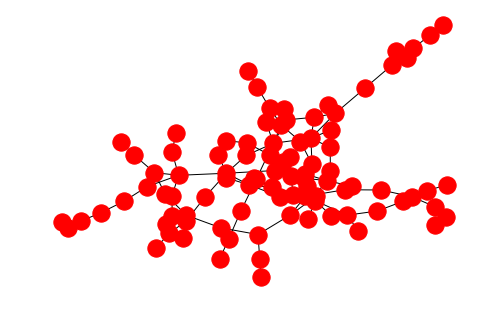

In [16]:
nx.draw_spring(augmented_forest)


In [17]:
graph.pcsf_objective_value(forest)


638.3993087190331

In [18]:
oi.get_networkx_graph_as_dataframe_of_nodes(augmented_forest).head()


,prize,Base_Mean,log2FC,StdErr,Wald_Stats,P_value,P_adj,terminal,type,degree,betweenness,louvain_clusters,location,general_process,specific_process,general_function,specific_function
ABCD1,5.517830,206.706956,-2.835321,0.183205,15.476223,5.020961e-54,1.648218e-52,True,protein,16,0.000000,4,peroxisome,cellular process,cellular component organization,transporter,lipid transporter
ADD3,2.924647,2596.830442,2.311630,0.062866,-36.770760,5.417044e-296,3.430129e-293,True,protein,25,0.000000,1,nucleus,cellular process,cellular component organization,structural molecule,structural constituent of cytoskeleton
AMOTL2,2.930907,3096.331203,-1.954230,0.053089,36.810636,1.247823e-296,8.114896e-294,True,protein,79,0.000000,0,cytoplasm,cellular process,cell communication,binding,protein binding
AP2A1,1.135907,2452.825093,1.391865,0.060715,-22.924545,2.644816e-116,2.566111e-114,True,protein,101,0.178466,0,golgi,biological regulation,regulation of biological process,binding,protein binding
BACE1,1.243755,1469.981300,2.035023,0.084830,-23.989391,3.588534e-127,4.212063e-125,True,protein,24,0.063784,4,golgi,metabolic process,nitrogen compound metabolic process,catalytic,hydrolase


In [20]:
oi.output_networkx_graph_as_interactive_html(augmented_forest, output_dir='./docs')


PosixPath('/Users/alex/Documents/abcd1/docs/graph.html')